In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on Fri Sep  4 08:25:01 2020

@author: priscila
"""
import healpy as hp
from astropy.table import Table, join, hstack, vstack
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

def convertepixel(path_dir):
    pixeldic = {}
    list_of_rows = []
    #path_dir = os.path.join(path_dir,dir)
    #path_dir = os.path.join(path_dir,'32768')
    for i,filename in enumerate(os.listdir(path_dir)):
        if i==0:
            pathfile = os.path.join(path_dir,filename)
            tab = Table.read(pathfile)
        else:
            pathfile = os.path.join(path_dir,filename)
            subtab = Table.read(pathfile)
            tab = vstack([tab, subtab])
            
    
        tmpfile = Table.read(os.path.join(path_dir,filename))
        ra = tmpfile['gra'][0]
        dec = tmpfile['gdec'][0]
        tmpfile = tmpfile.to_pandas()
        rows, columns = tmpfile.shape
        pixeldic[hp.ang2pix(64,ra,dec,lonlat = True)] = rows

    return tab, pixeldic

def catch_pixel(ra,dec):
    NSIDE = 64
    return hp.pixelfunc.ang2pix(NSIDE, ra, dec, lonlat = True)


data = Table.read('/home/priscila/devel/mestrado/gama.fits').to_pandas()
pix, dic_pix = convertepixel( '/home/priscila/devel/mestrado/ps1/64')
pix = pix.to_pandas().to_numpy()
data = data.to_numpy()
#path_dir = sys.argv[2]
ra = data[:,3]
dec = data[:,4]
rapix = pix[:,15]
decpix = pix[:,16]
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
result_gama = np.array(list(map(catch_pixel,ra,dec)))
result = Counter(result_gama)
percent = []
for key in result:
    percent.append(float(float(dic_pix[key])/float(result[key])))
result_pix = np.array(list(map(catch_pixel,rapix,decpix)))   
#plt.hist(result)
#plt.hist([result_gama,result_pix],bins = 377,label=['GAMA', 'PAN STARRS'])
#plt.show()
#plt.hist([percent],label=['Match Percentage'])
#plt.legend(loc='upper right')
#plt.show()

In [2]:
print(len(result_gama))


214624


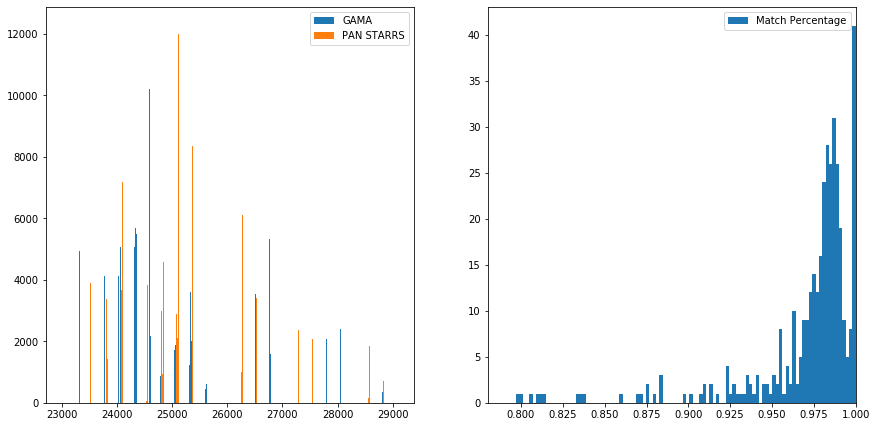

In [8]:
fig = plt.figure()
grid = plt.GridSpec(1,2,top=1.5,right=2)
ax = plt.subplot(grid[0,0])
plt.hist([result_gama,result_pix],bins = 377,label=['GAMA', 'PAN STARRS'])
plt.legend(loc='best')
ax1 = plt.subplot(grid[0,1])
ax1.set_xlim(0.78,1.0)
plt.hist([percent],label=['Match Percentage'], bins=500)
plt.legend(loc='best')